## Face Mask Detection

* Download Image dataset
* Visualise  the dataset
* Preprocessing 
    * Split dataset
    * Image Augmentation
    * Data Generator
* Define Model Architecture 
* Train Model
* Evaluate model
    * Plot Loss & Accuracy 
* Predict on test dataset
    * Mask
    * NoMask


In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Download Image dataset

In [13]:
!git clone https://github.com/AI-Notion/face_mask_detection-.git

Cloning into 'face_mask_detection-'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (8/8), 37.00 MiB | 803.00 KiB/s, done.


### unzip dataset

In [35]:
data_dir = "face_mask_detection-"
li = ["test.zip", "with_mask.zip", "without_mask.zip"]

In [36]:
import zipfile

In [38]:
for file in li:
    zip_ref = zipfile.ZipFile(data_dir+"/"+file)
    zip_ref.extractall("image_dataset")
    zip_ref.close()

## Visualise  the dataset

In [44]:
import random
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [45]:
def view_random_image(target_dir,target_class):
    target_folder = target_dir+target_class
    
    random_image = random.sample(os.listdir(target_folder),1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image Shape: {img.shape}")
    
    return img

Image Shape: (640, 480, 3)


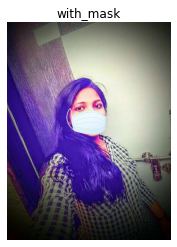

In [54]:
img = view_random_image(target_dir="image_dataset/", target_class="with_mask")

## Preprocessing
    * Split dataset
    * Image Augmentation
    * Data Generator

In [56]:
img_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [57]:
img_data_dir = "image_dataset"

In [59]:
train_img = img_gen.flow_from_directory(directory=img_data_dir,
                                       batch_size=32,
                                       target_size=(224,224),
                                       class_mode="binary",
                                       subset="training",
                                       seed=42)

Found 1008 images belonging to 2 classes.


In [60]:
test_img = img_gen.flow_from_directory(directory=img_data_dir,
                                      batch_size=32,
                                      target_size=(224,224),
                                      class_mode="binary",
                                      subset="validation",
                                      seed=42)

Found 252 images belonging to 2 classes.


## Define Model Architecture

In [66]:
model = tf.keras.models.Sequential([
    #conv2d    
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224,224,3)),
    #conv2d
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    
    #maxpool2d
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    #conv2d
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    
    #conv2d
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(1,activation="sigmoid")
])

2022-02-12 04:44:28.639819: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Train Model

    compile and Fit the model

In [70]:
model.compile(loss="binary_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [71]:
history = model.fit(train_img,
                   epochs=20,
                   steps_per_epoch=len(train_img),
                   validation_data=test_img,
                   validation_steps=len(test_img))

2022-02-12 04:50:36.724063: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
32/32 [==============================] - 22s 660ms/step - loss: 0.6585 - accuracy: 0.6310 - val_loss: 0.4611 - val_accuracy: 0.8810
Epoch 2/20
32/32 [==============================] - 21s 653ms/step - loss: 0.2282 - accuracy: 0.9256 - val_loss: 0.1591 - val_accuracy: 0.9167
Epoch 3/20
32/32 [==============================] - 19s 593ms/step - loss: 0.1496 - accuracy: 0.9405 - val_loss: 0.1706 - val_accuracy: 0.9365
Epoch 4/20
32/32 [==============================] - 19s 594ms/step - loss: 0.1077 - accuracy: 0.9663 - val_loss: 0.1050 - val_accuracy: 0.9524
Epoch 5/20
32/32 [==============================] - 19s 594ms/step - loss: 0.0723 - accuracy: 0.9762 - val_loss: 0.0939 - val_accuracy: 0.9603
Epoch 6/20
32/32 [==============================] - 19s 586ms/step - loss: 0.0576 - accuracy: 0.9802 - val_loss: 0.0763 - val_accuracy: 0.9683
Epoch 7/20
32/32 [==============================] - 19s 583ms/step - loss: 0.0424 - accuracy: 0.9861 - val_loss: 0.0603 - val_accuracy: 0.9841

## Evaluate model
    Plot Loss & Accuracy 

In [76]:
# Plot the validation and training data separately
import matplotlib.pyplot as plt
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

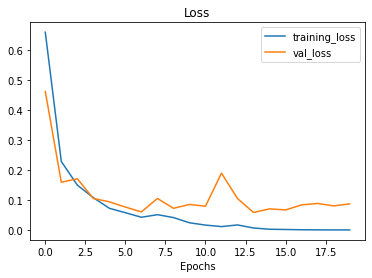

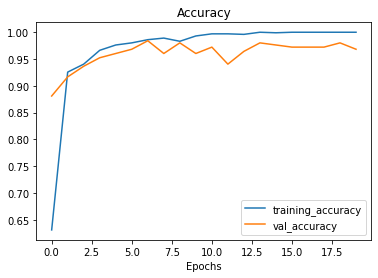

In [77]:
plot_loss_curves(history)

# Predict on test dataset
    * Mask
    * NoMask

In [107]:
test1 = "test/t1.jpeg"
test2 = "test/t2.jpeg"

In [102]:
import pathlib
import numpy as np

In [103]:
test_data_dir = pathlib.Path("image_dataset")
class_names = np.array(sorted([item.name for item in test_data_dir.glob("*")]))

In [104]:
class_names

array(['.DS_Store', 'with_mask', 'without_mask'], dtype='<U12')

In [105]:
class_names = class_names[1:]
class_names

array(['with_mask', 'without_mask'], dtype='<U12')

In [106]:
def load_and_prep_image(filename, image_shape=224):
    
    img = tf.io.read_file(filename)
    
    img = tf.image.decode_image(img, channels=3)
    
    img = tf.image.resize(img, size = [image_shape, image_shape])
    
    img = img/255.
    
    return img

In [117]:
result1 = load_and_prep_image(test2)

In [118]:
result1.shape

TensorShape([224, 224, 3])

In [119]:
result1 = tf.expand_dims(result1,axis=0)

In [120]:
pred = model.predict(result1)

In [121]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'without_mask'

In [122]:
model.save("final_model_20/mask_dect.h5")